<a href="https://colab.research.google.com/github/ashtonsouthwick/DSPS_ASouthwick/blob/main/HW10/Southwick_kerasmnist_mlp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import pylab as plt
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Input


In [2]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
np.unique(x_train)

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [4]:
x_train = x_train.astype(float) / 255.
x_test = x_test.astype(float) / 255.


In [5]:
x_train.shape

(60000, 28, 28)

In [6]:
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

In [7]:
x_train.shape

(60000, 28, 28, 1)

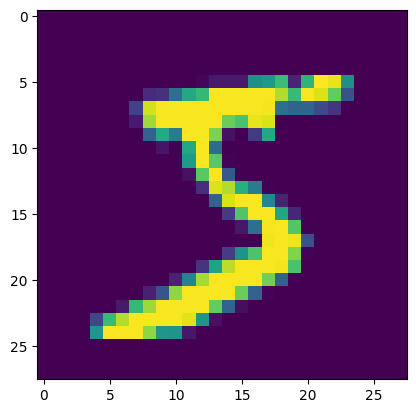

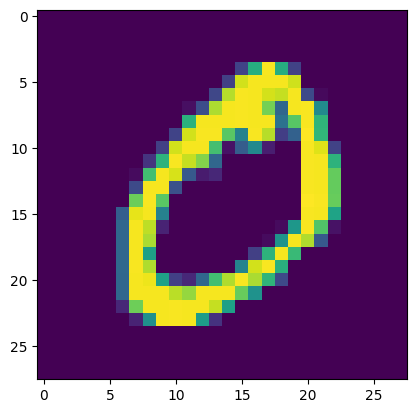

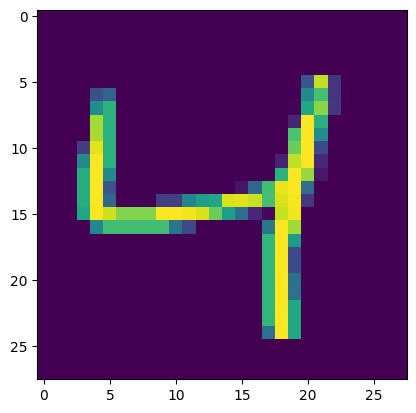

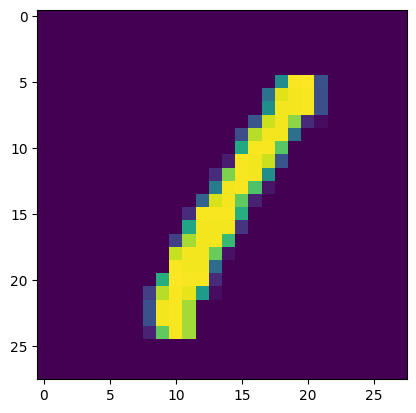

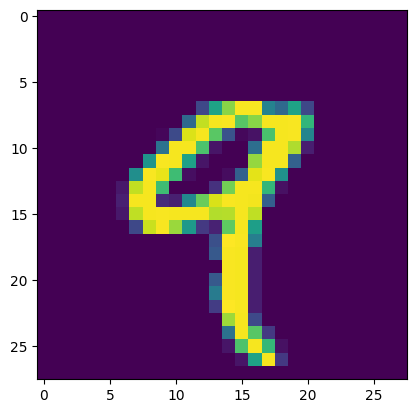

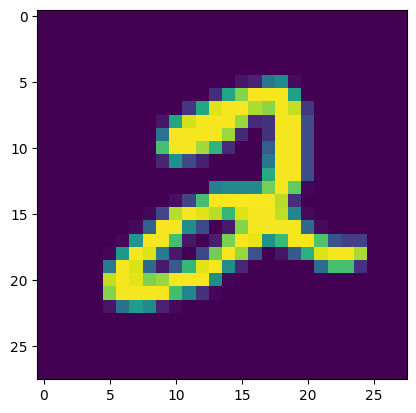

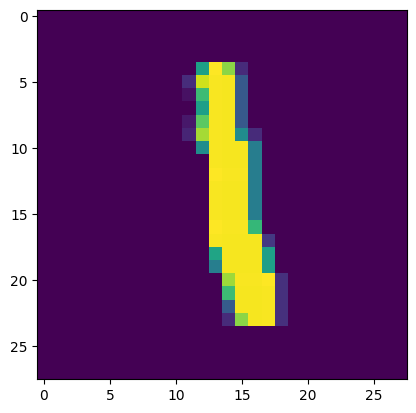

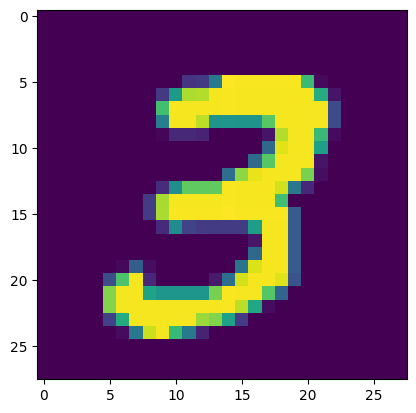

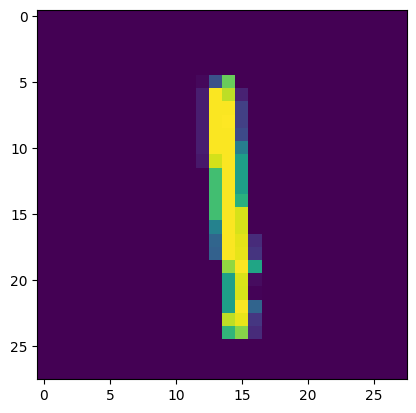

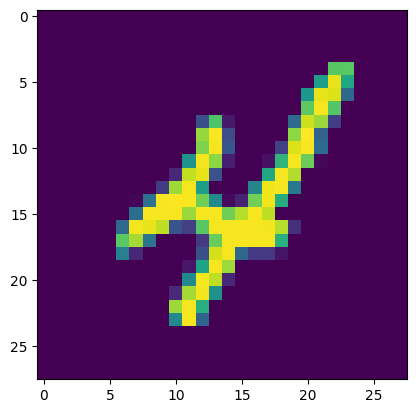

In [8]:
for i in range(10):
  plt.imshow(x_train[i])
  plt.show()

In [9]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [10]:
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

In [11]:
x_trainraveled = x_train.reshape(x_train.shape[0], x_train.shape[1]*x_train.shape[2]*x_train.shape[3])

In [12]:
x_testraveled = x_test.reshape(x_test.shape[0], x_test.shape[1]*x_test.shape[2]*x_test.shape[3])

In [13]:
x_test.shape

(10000, 28, 28, 1)

In [14]:
x_testraveled.shape

(10000, 784)

In [15]:
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1]*x_test.shape[2]*x_test.shape[3])

In [16]:
mlp = keras.Sequential([
    layers.Dense(320, activation='sigmoid'),
    layers.Dense(32, activation='sigmoid'),
    layers.Dense(32, activation='sigmoid'),
    layers.Dense(10, activation='softmax')
])

In [17]:
mlp.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [18]:
history = mlp.fit(x_trainraveled, y_train, batch_size=120, epochs=10, validation_split=0.25, verbose=1)

Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.4877 - loss: 1.7973 - val_accuracy: 0.8874 - val_loss: 0.6558
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9025 - loss: 0.5316 - val_accuracy: 0.9265 - val_loss: 0.3142
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9364 - loss: 0.2749 - val_accuracy: 0.9440 - val_loss: 0.2208
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9518 - loss: 0.1931 - val_accuracy: 0.9522 - val_loss: 0.1811
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9627 - loss: 0.1449 - val_accuracy: 0.9583 - val_loss: 0.1518
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9704 - loss: 0.1178 - val_accuracy: 0.9613 - val_loss: 0.1350
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9759 - loss: 0.0938 - val_accuracy: 0.9639 - val_loss: 0.1233
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9804 - loss: 0.0781 - val_accuracy: 0.

In [19]:
history.history

{'accuracy': [0.6868666410446167,
  0.9124444723129272,
  0.9384444355964661,
  0.9530444741249084,
  0.9625999927520752,
  0.9704444408416748,
  0.9756444692611694,
  0.9803555607795715,
  0.983822226524353,
  0.9872000217437744],
 'loss': [1.3431835174560547,
  0.4422808289527893,
  0.2544037103652954,
  0.18409956991672516,
  0.14233864843845367,
  0.11429335922002792,
  0.09356527030467987,
  0.07681532204151154,
  0.06350082159042358,
  0.05251927673816681],
 'val_accuracy': [0.8873999714851379,
  0.9265333414077759,
  0.9440000057220459,
  0.9521999955177307,
  0.9583333134651184,
  0.9612666964530945,
  0.963866651058197,
  0.9673333168029785,
  0.9673333168029785,
  0.9698666930198669],
 'val_loss': [0.6557921171188354,
  0.3141503632068634,
  0.22079487144947052,
  0.18106673657894135,
  0.1517823338508606,
  0.13498400151729584,
  0.12328828126192093,
  0.11477934569120407,
  0.11118702590465546,
  0.10527585446834564]}

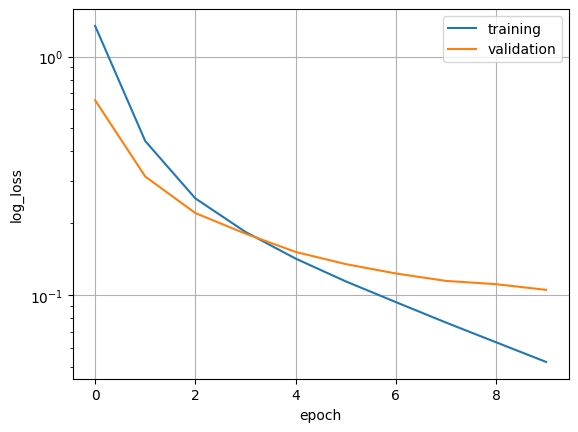

In [37]:
plt.plot(history.history['loss'], label="training")
plt.plot(history.history['val_loss'], label="validation")
plt.xlabel("epoch")
plt.ylabel("log_loss")
plt.legend()
plt.grid()
plt.yscale('log')

Figure 1:

Loss over epochs for training and validation set of neural network using keras.

The training set decays towards zero. The validation set decays towards zero as well, but slower than the training set. It also seems to start to plateau towards the end. This difference towards the end indicates that the model begins to learn the training data too well, and fails to generalize the unseen data.

In [21]:
|mlp.evaluate(x_testraveled, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9711 - loss: 0.1062


[0.09334799647331238, 0.9745000004768372]

In [24]:
input_shape = (28,28,1)

model = Sequential((
    Input(shape=input_shape),
    Conv2D(32, kernel_size=(10, 10), activation="relu"),
    Conv2D(64, kernel_size=(3, 3), activation="relu"),
    MaxPooling2D(pool_size=(2,2)),
    Conv2D(32, kernel_size=(3,3), activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

cnn_history = model.fit(x_train, y_train, batch_size=120, epochs=10, validation_split=0.25, verbose=1)


Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.8106 - loss: 0.6262 - val_accuracy: 0.9698 - val_loss: 0.1002
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9736 - loss: 0.0840 - val_accuracy: 0.9779 - val_loss: 0.0779
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9834 - loss: 0.0526 - val_accuracy: 0.9803 - val_loss: 0.0656
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9869 - loss: 0.0439 - val_accuracy: 0.9823 - val_loss: 0.0602
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9889 - loss: 0.0356 - val_accuracy: 0.9847 - val_loss: 0.0507
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9914 - loss: 0.0268 - val_accuracy: 0.9865 - val_loss: 0.0475
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9914 - loss: 0.0255 - val_accuracy: 0.9861 - val_loss: 0.0446
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9937 - loss: 0.0191 - val_accuracy: 0

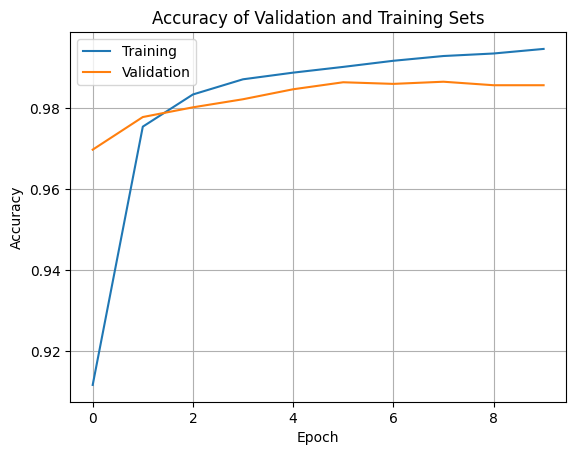

In [39]:
plt.plot(cnn_history.history['accuracy'], label="Training")
plt.plot(cnn_history.history['val_accuracy'], label='Validation')
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Accuracy of Validation and Training Sets")
plt.grid()
plt.legend()

Figure 2:

Accuracy of validation and training sets of convolutional neural network using Conv2D, MaxPooling2D, and Dense deep learning model techniques, with relu activation functions, and softmax for the final layer. The training set instantly shoots up at the first epoch, then starts to slowly increase towards 100% accuracy. The validation set seems to plateau early on, but both the validation and training sets have high and similar accuracies, indicating a good fit.

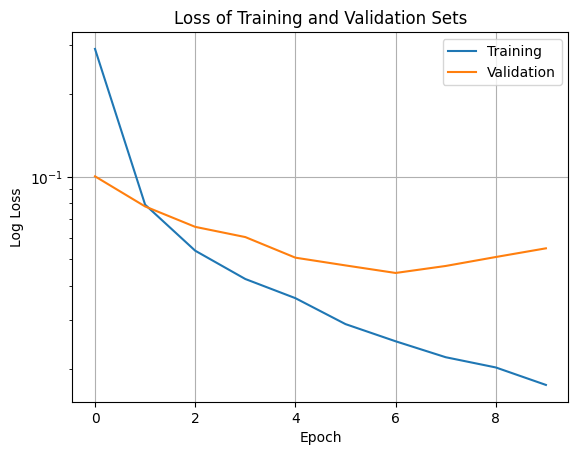

In [36]:
plt.plot(cnn_history.history['loss'], label="Training")
plt.plot(cnn_history.history['val_loss'], label='Validation')
plt.xlabel("Epoch")
plt.ylabel("Log Loss")
plt.title("Loss of Training and Validation Sets")
plt.grid()
plt.legend()
plt.yscale('log')

Figure 3: Log loss over epochs for training and validation sets for the same convolutional neural network as Figure 2. The training set rapidly decays at the first epoch, then starts to decay slower towards zero. The validation set starts off by slowly decaying towards zero, but then after the 6th epoch it begins to increase, indicating overfitting.